# **Análise da Variação dos Preços das Hospedagens do Airbnb em NY**

### Introdução

Durante meus estudos de Data Analytics, Business Intelligence, SQL e Power BI em 2019 para projeto em meu atual emprego, naturalmente conheci conceitos e ferramentas de Data Science. Assim, em 2020, iniciei, paralalelamente ao que já estava estudando, capacitação em Python e seus bibliotecas.

Desta forma, um dos exercícios recorrentes para treinar o aprendizado, são análises de dados abertos do Airbnb, como o disponibilizado.

Por isso, ao invés de fazer a análise pelo Power BI, saí da zona de conforto e decidi por fazer essa análise usando bibliotecas Python usadas por Cientistas de Dados.

In [ ]:
#importação de bibliotecas que poderão ser necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import numpy as np

Neste primeiro momento, é feita uma análise inicial dos dados, quantidade de itens, colunas e seus respectivos tipos. Assim como entender como estão dispostos.

In [ ]:
#importando o arquivo disponibilizado e verificando a quantidade de dados
df = pd.read_csv('/content/AB_NYC_2019.csv', sep=',')
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

Variáveis:	 48895
Entradas:	 16



In [ ]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


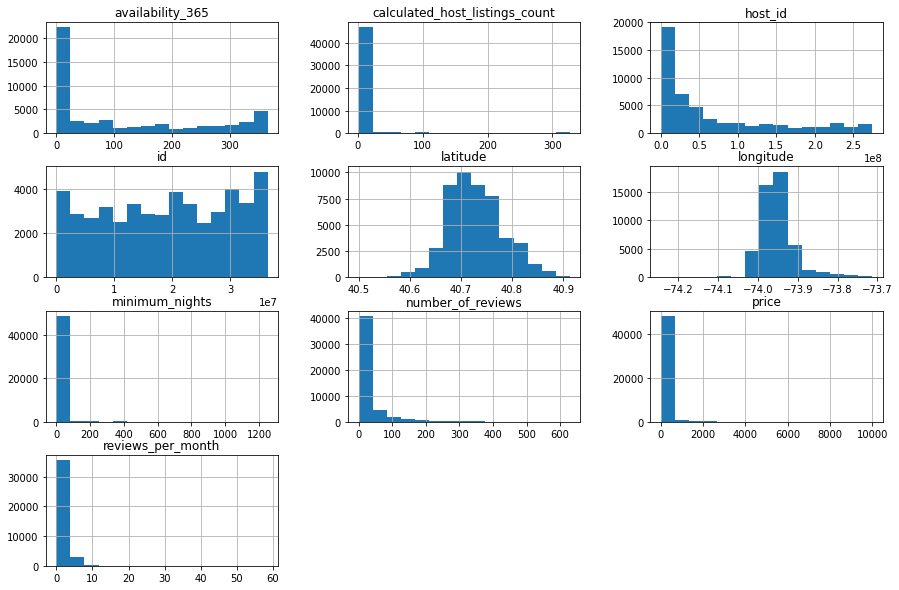

In [ ]:
df.hist(bins=15, figsize=(15,10));

Já entendendo como estão dispostos os dados, é feita a primeira análise superficial em cima do foco do exercício em questão: Preço.
Apenas com essas primeiras informações mostradas abaixo, já é possível verificar que existe grande número de *outliers*, porém, a maior parte das acomodações não tem o valor superior a $175.00.

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Preço de Hospedagens Geral')

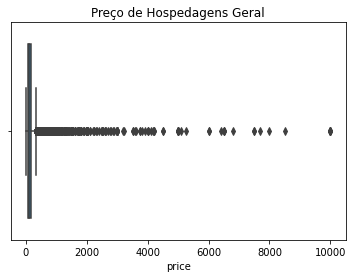

In [ ]:
srn.boxplot(df.price).set_title('Preço de Hospedagens Geral')

Para se ter certeza que são *outliers*, é importante verificar a qualidade dos dados, identificando valores nulos. Porém, ao fazer essa verificação, concluí-se que é de boa qualidade os dados, apenas as colunas [reviews_per_month] e [last_review] possuem 20% de dados nulos. Coluna [price] não há valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.205583
last_review                       0.205583
host_name                         0.000429
name                              0.000327
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

Inciamos agora uma análise um pouco mais profunda, correlacionando com outros parâmetros, primeiramente faremos com o o Tipo de Acomodação [room_type] e, como já era de se imaginar, os **quartos compartilhados** são visivelmente mais baratos e possuem poucos *outliers*, seguindo dos **quartos privativos** e das **acomodações completas**, onde vemos o maior número de *outliers*.

In [ ]:
df.groupby(['room_type']).price.mean().sort_values(ascending=False)

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

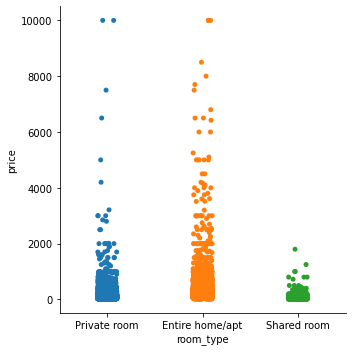

In [ ]:
srn.catplot(x = 'room_type', y = 'price', data = df)

Agora cruzamos os valores com o grupo dos bairros, onde vemos que **Manhattan** é o de maior valor, seguido pelas acomodações do **Brooklyn**. Ambos também possuem grande variação de seus valores. 

In [ ]:
df.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

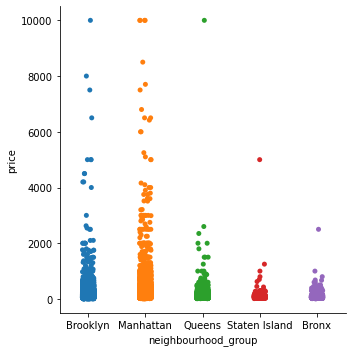

In [ ]:
srn.catplot(x = 'neighbourhood_group', y = 'price', data = df)

Como seriam muitos bairros para plotarmos, abaixo pode-se verificar, pela média dos valores, quais são os bairros mais caros e mais baratos.

In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64

In [ ]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)[:10]

neighbourhood
Bull's Head       47.333333
Hunts Point       50.500000
Tremont           51.545455
Soundview         53.466667
New Dorp          57.000000
Bronxdale         57.105263
New Dorp Beach    57.400000
Grant City        57.666667
Concord           58.192308
Mount Eden        58.500000
Name: price, dtype: float64

Para verificar se há relação com as demais variáveis, foi criada uma *matriz de correlação* e um *heatmap*:

In [ ]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


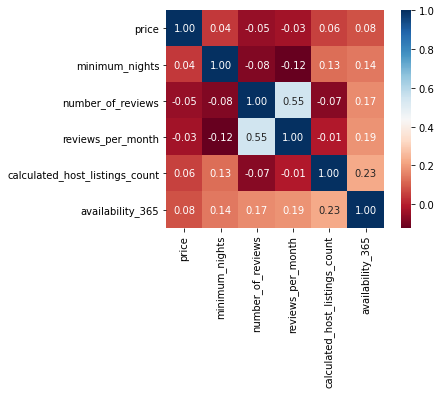

In [ ]:
srn.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Como curiosidade, como nos foi disponibilizado latitude e longitude, foi plotada as acomodações no mapa. Cabe-se aqui ressaltar que fica nitída a concentração das hospedagens no eixo Manhattan-Brooklyn. Também é visível o preenchimento total de Manhattan, com apenas uma grande exceção: um retangulo branco, o Central Park. 

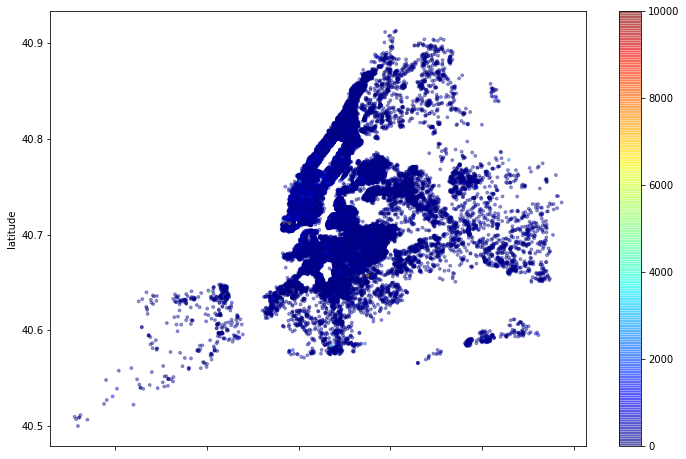

In [ ]:
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

##Conclusão

Apesar de uma análise quase que superificial, foi possível demonstrar as técnias que seria utilizadas na primeira fase do exercício 3, já explanadas no arquivo txt. 